<a href="https://colab.research.google.com/github/victorteodoro/exploratory-data-analysis-mackenzie/blob/main/code/aula%207/AED_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# Projeto de Análise Exploratória de Dados
---

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Gênero e agricultura no Quênia</font></h1>
<hr>

## Grupo empty cups to explore data

Turma 02A

**Integrantes**

| Nome                         | TIA      |
| ---------------------------- | -------- |
| Victor José de Souza Teodoro | 23002263 |
| Aline Souza Aprelini         | 22009205 |
| Vagner Milani                | 23018021 |
|Lucas Melo da Mata            | 22500995 |


# Problema
  
Nos propomos a investigar os dados sobre a agricultura e distribuição populacional do Quênia para tentar encontrar padrões na sua agricultura e população. Divido em dois grandes eixos:

- Agricultura: como é a distribuição das culturas pelo país? Ela é concentrada ou diversificada?
- População: qual a distribuição de gêneros no Quênia? É igual entre homens e mulheres? E quão presentes são os transgêneros? Isso indica uma sociedade progressista ou conservadora?

# Descrição e origem dos dados

Os dados do censo de 2019 do Quênia foram disponibilizados como parte do [projeto tidytuesday](https://github.com/rfordatascience/tidytuesday/tree/master) que agrega vários datasets (com foco em R) para auxiliar no aprendizado da Análise Exploratória de Dados. Mais especificamente nossos dados vieram da contribuição de [Shelmith Kariuki](https://github.com/rfordatascience/tidytuesday/tree/master/data/2021/2021-01-19).

Os dados são dividos em 3 tabelas:

- Crops: em que se descreve quais culturas são praticadas em quais condados em quantas pessoas a praticam
- Households: que trás dados dos lares quenianos como tamanho médio e população dos condados em que estão
- Gender: dados da distribuição por gêneros nos diferentes condados do Quênia.

Um dicionário dos dados está [disponível no Github](https://github.com/rfordatascience/tidytuesday/tree/master/data/2021/2021-01-19#data-dictionary).

# Aquisição dos Dados

Faça aqui a aquisição dos dados, justificando e incluindo aqui eventuais  reduções as efetuadas.

Não deixe de descrever e justificar reduções (seleções) feitas nos dados originais para os seus propósitos (por exemplo, selecionou somente dados do último ano, somente dados de países da América Latina ou selecionou somente algumas tabelas dentre várias tabelas disponíveis).





In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [177]:
crops = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-19/crops.csv') # df
gender = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-19/gender.csv') # df1
households = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-19/households.csv') # df2

# Análise dos dados

## Crops

### Apresentação do dataset

In [17]:
crops.sample(5)

,SubCounty,Farming,Tea,Coffee,Avocado,Citrus,Mango,Coconut,Macadamia,Cashew Nut,Khat (Miraa)
12,MERU,274865,30404.0,28195.0,41746.0,6255.0,27457.0,NaN,29545.0,NaN,85023.0
27,UASIN GISHU,141547,NaN,NaN,8430.0,1376.0,2505.0,NaN,NaN,NaN,NaN
23,TURKANA,61209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,KAJIADO,97565,NaN,NaN,2994.0,NaN,2776.0,NaN,NaN,NaN,NaN
43,HOMA BAY,193812,1365.0,2864.0,29880.0,7496.0,34557.0,NaN,1554.0,NaN,NaN


In [18]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SubCounty     48 non-null     object 
 1   Farming       48 non-null     int64  
 2   Tea           20 non-null     float64
 3   Coffee        25 non-null     float64
 4   Avocado       36 non-null     float64
 5   Citrus        38 non-null     float64
 6   Mango         40 non-null     float64
 7   Coconut       7 non-null      float64
 8   Macadamia     22 non-null     float64
 9   Cashew Nut    7 non-null      float64
 10  Khat (Miraa)  5 non-null      float64
dtypes: float64(9), int64(1), object(1)
memory usage: 4.3+ KB


### Tratamento de valores nulos

`crops` possui várias colunas com valores nulos. Aquelas que têm a maioria dos valores nulos serão ignoradas no resto da análise porque não oferecem dados suficientes para se chegar a conclusões válidas.

In [ ]:
crops.isna().sum()

SubCounty        0
Farming          0
Tea             28
Coffee          23
Avocado         12
Citrus          10
Mango            8
Coconut         41
Macadamia       26
Cashew Nut      41
Khat (Miraa)    43
dtype: int64

In [33]:
crops = crops.drop(columns=['Coconut', 'Cashew Nut', 'Khat (Miraa)'])

Como apenas as colunas com valores numéricos possuem valores faltantes, podemos usar um ferramenta de auxílio para o preenchimento dos valores nulos.

Nesse caso escolhemos o `SimpleImputer` do `scikit-learn` para testar o efeito de várias estratégias. Acabamos optando por preencher com 0 esses valores para não influenciar nossas visualizações abaixo.

In [178]:
imputer = SimpleImputer(strategy='constant', fill_value=0).set_output(transform="pandas")

crops_only_numeric = crops.select_dtypes(include='number')

crops_only_numeric = imputer.fit_transform(crops_only_numeric)

crops = pd.concat([crops[['SubCounty']], crops_only_numeric], axis=1)

In [179]:
crops.isna().sum()

SubCounty       0
Farming         0
Tea             0
Coffee          0
Avocado         0
Citrus          0
Mango           0
Coconut         0
Macadamia       0
Cashew Nut      0
Khat (Miraa)    0
dtype: int64

## Análise de gênero (*gender*)

### Apresentação do dataset

In [36]:
gender.sample(5)

,County,Male,Female,Intersex,Total
25,Samburu,156774,153546,7,310327
27,Uasin Gishu,580269,582889,28,1163186
39,Bungoma,812146,858389,35,1670570
37,Kakamega,897133,970406,40,1867579
24,West Pokot,307013,314213,15,621241


In [37]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   County    48 non-null     object
 1   Male      48 non-null     int64 
 2   Female    48 non-null     int64 
 3   Intersex  48 non-null     int64 
 4   Total     48 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.0+ KB


### Tratamento de valores nulos

`gender` felizmente não possui valores nulos. Portanto não precisamos de pré-tratamento aqui.

In [35]:
gender.isna().sum()

County      0
Male        0
Female      0
Intersex    0
Total       0
dtype: int64

## Análise dos lares (*households*)

### Apresentação do dataset

In [38]:
households.sample(5)

,County,Population,NumberOfHouseholds,AverageHouseholdSize
38,Vihiga,587189,143365,4.1
34,Kajiado,1107296,316179,3.5
15,Kitui,1130134,262942,4.3
10,Marsabit,447150,77495,5.8
35,Kericho,896863,206036,4.4


In [39]:
households.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   County                48 non-null     object 
 1   Population            48 non-null     int64  
 2   NumberOfHouseholds    48 non-null     int64  
 3   AverageHouseholdSize  48 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.6+ KB


### Tratamento de valores nulos

`households` felizmente não possui valores nulos. Portanto não precisamos de pré-tratamento aqui.

In [40]:
households.isna().sum()

County                  0
Population              0
NumberOfHouseholds      0
AverageHouseholdSize    0
dtype: int64

## União de `households` e `gender`

Para facilitar as análises, iremos unir os os datasets `households` e `gender`. Com isso é mais fácil correlacionar a distribuição de gênero com o tamanho populacão, o tamanho médio das casas, &c.

In [41]:
gender['County'].unique()

array(['Total', 'Mombasa', 'Kwale', 'Kilifi', 'Tana River', 'Lamu',
       'Taita/Taveta', 'Garissa', 'Wajir', 'Mandera', 'Marsabit',
       'Isiolo', 'Meru', 'Tharaka-Nithi', 'Embu', 'Kitui', 'Machakos',
       'Makueni', 'Nyandarua', 'Nyeri', 'Kirinyaga', "Murang'a", 'Kiambu',
       'Turkana', 'West Pokot', 'Samburu', 'Trans Nzoia', 'Uasin Gishu',
       'Elgeyo/Marakwet', 'Nandi', 'Baringo', 'Laikipia', 'Nakuru',
       'Narok', 'Kajiado', 'Kericho', 'Bomet', 'Kakamega', 'Vihiga',
       'Bungoma', 'Busia', 'Siaya', 'Kisumu', 'Homa Bay', 'Migori',
       'Kisii', 'Nyamira', 'Nairobi City'], dtype=object)

In [42]:
households['County'] = households['County'].str.strip()
households['County'].unique()

array(['Kenya', 'Mombasa', 'Kwale', 'Kilifi', 'TanaRiver', 'Lamu',
       'Taita/Taveta', 'Garissa', 'Wajir', 'Mandera', 'Marsabit',
       'Isiolo', 'Meru', 'Tharaka-Nithi', 'Embu', 'Kitui', 'Machakos',
       'Makueni', 'Nyandarua', 'Nyeri', 'Kirinyaga', "Murang'a", 'Kiambu',
       'Turkana', 'WestPokot', 'Samburu', 'TransNzoia', 'UasinGishu',
       'Elgeyo/Marakwet', 'Nandi', 'Baringo', 'Laikipia', 'Nakuru',
       'Narok', 'Kajiado', 'Kericho', 'Bomet', 'Kakamega', 'Vihiga',
       'Bungoma', 'Busia', 'Siaya', 'Kisumu', 'HomaBay', 'Migori',
       'Kisii', 'Nyamira', 'NairobiCity'], dtype=object)

In [45]:
population_and_gender = gender.merge(households, on='County')
population_and_gender.sample(5)

,County,Male,Female,Intersex,Total,Population,NumberOfHouseholds,AverageHouseholdSize
33,Vihiga,283678,306323,12,590013,587189,143365,4.1
16,Nyandarua,315022,323247,20,638289,636002,179686,3.5
2,Kilifi,704089,749673,25,1453787,1440958,298472,4.8
22,Samburu,156774,153546,7,310327,307957,65910,4.7
20,Kiambu,1187146,1230454,135,2417735,2402834,795241,3.0


## Seleção de dados

Perceba que os dados de população em `Population` e `Total` não são iguais. Isso se deve a corrupção nos dados, dados coletados por métodos diferentes ou outros fatores. Para não afetar a nossa análise da distribuição de homens e mulheres, iremos considerar a população em `Total` de agora em diante porque ela é a soma dos valores de `Male`, `Female` e `Intersex`.

In [50]:
population_and_gender['Population'] = population_and_gender['Total']
population_and_gender = population_and_gender.drop(columns=['Population'])
population_and_gender = population_and_gender.rename(columns={'Total': 'Population'})
population_and_gender.sample(5)

,County,Male,Female,Intersex,Total,NumberOfHouseholds,AverageHouseholdSize
39,Kisii,605784,661038,38,1266860,308054,4.1
24,Nandi,441259,444430,22,885711,199426,4.4
36,Siaya,471669,521496,18,993183,250698,3.9
11,Tharaka-Nithi,193764,199406,7,393177,109860,3.6
40,Nyamira,290907,314656,13,605576,150669,4.0


# Pergunta 1

Qual a relação entre o tamanho médio das residências com o tamanho do condado em que estão?

**Resposta:** muito pouca. Perceba nos gráficos abaixo que `AverageHouseholdSize` tem uma corelação bem pequena negativa com quase todas as outras colunas com exceção de `NumberOfHouseholds`, com que tem uma correlação negativa maior. Portanto parece que quanto maior o número de casas menor o número médio de moradores de cada casa num dado condado. Isso faz sentido com o que esperamos, já que para uma dada população, quanto maior o número de casas, menor tende a ser o número de pessoas por casa.

<Figure size 1200x800 with 0 Axes>

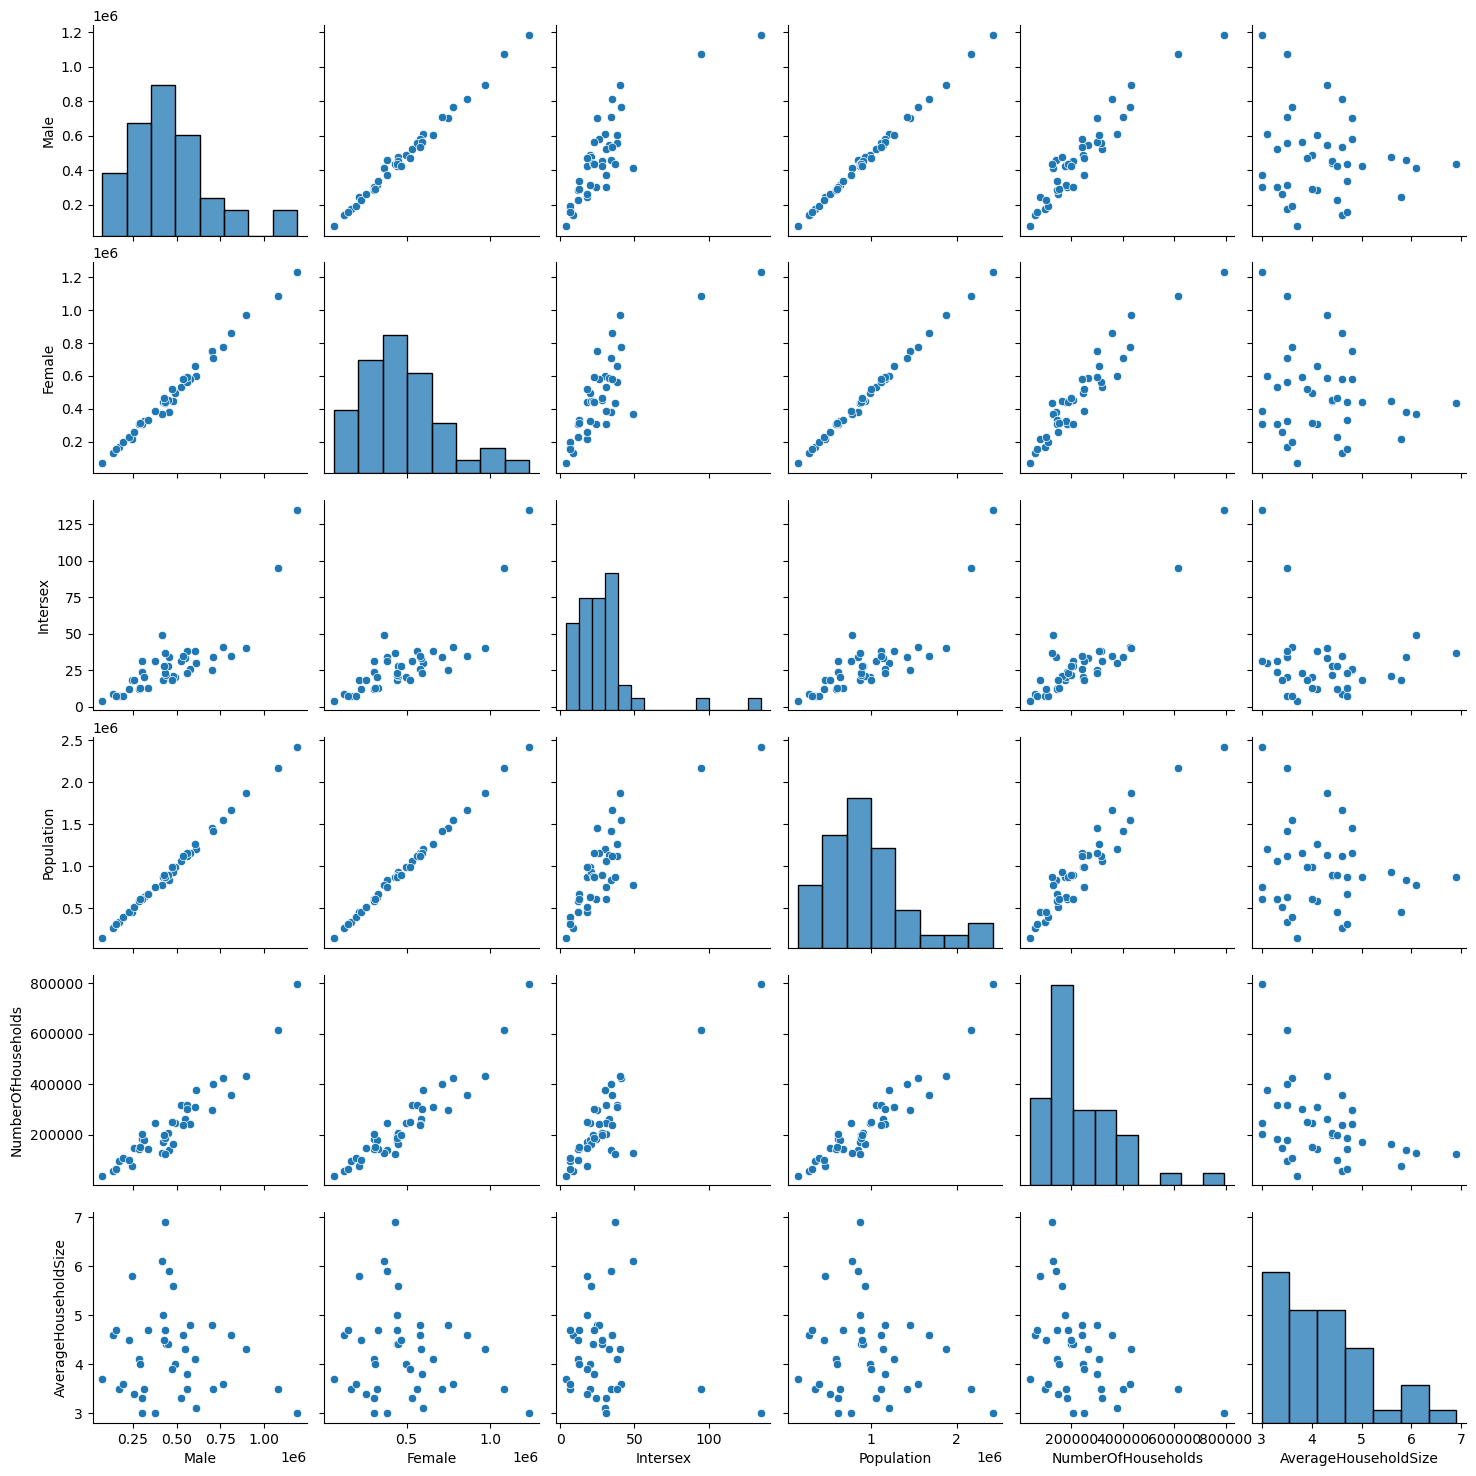

In [58]:
plt.figure(figsize=(12, 8))

sns.pairplot(population_and_gender)

<Axes: >

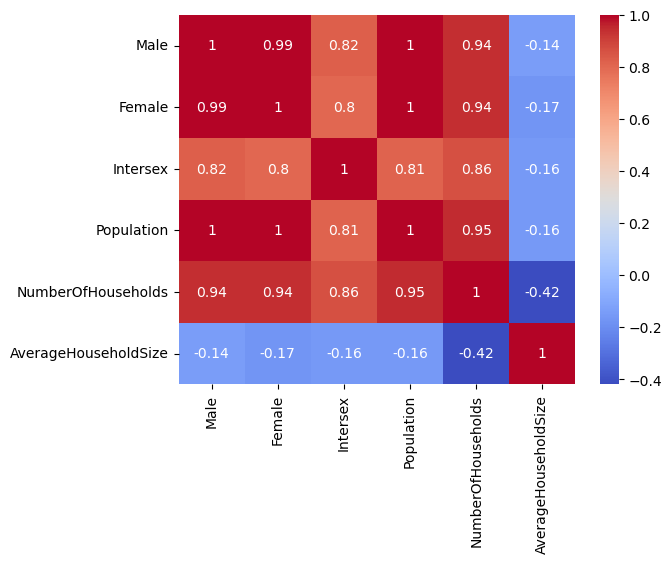

In [59]:
corr = population_and_gender.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm')

# Pergunta 2

Quais os 10 condados com maior população?

In [77]:
top_10_pops = population_and_gender[['County', 'Population']].sort_values(by='Population', ascending=False).head(10)

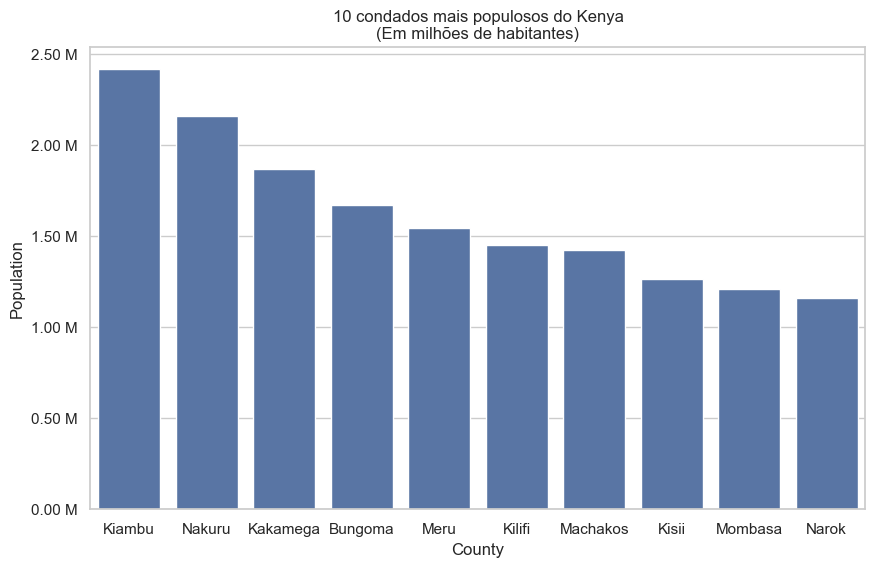

In [82]:
from matplotlib.ticker import FuncFormatter

sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(top_10_pops, x='County', y='Population')

plt.title('10 condados mais populosos do Kenya\n(Em milhões de habitantes)')

# Define a custom formatting function for the y-axis labels
def format_ticks(value, _):
    return f'{value/1_000_000:.2f} M'

# Apply the custom formatting function to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))

# Show the plot
plt.show()


# Pergunta 3

Nos 10 condados de maior população, qual o maior produtor de cada cultura (*crops*) para as quais temos dados?

## Resposta

- Chá: Kisii
- Café: Kisii
- Abacate: Kisii
- Cítricos: Machakos
- Manga: Machakos
- Macadâmia: Meru

Percebemos que, dentre os grandes condados em termos populacionais, Kisii é um grande produtor em geral, com muitas pessoas produzindo 3 das culturas estuadas. Porém há condados especializados em culturas especiais como Meru com a Macâdamia, que é utilizada na alta gastronomia e em pratos finos.

## Limpeza

Antes de começar precisamos limpar um pouco o nome dos condados entre as tabelas `crops` e `population_and_gender`. As grafias estão diferentes nos dois datasets.

In [180]:
crops = crops.rename(columns={'SubCounty': 'County'})
population_and_gender['County'] = population_and_gender['County'].str.upper()

## Transformações

Agora vamos buscar os dados de população na tabela `population_and_gender` e juntá-los aos dados de `crops` para podermos correlacionar população e culturas.

In [181]:
crops = pd.merge(crops, population_and_gender[['County', 'Population']], on='County', how='left')
crops.sample(5)

,County,Farming,Tea,Coffee,Avocado,Citrus,Mango,Coconut,Macadamia,Cashew Nut,Khat (Miraa),Population
4,TANA RIVER,35094.0,0.0,0.0,0.0,1109.0,6561.0,2228.0,0.0,1691.0,0.0,NaN
37,KAKAMEGA,335269.0,4644.0,2990.0,63886.0,4435.0,49075.0,0.0,2292.0,0.0,0.0,1867579.0
23,TURKANA,61209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,926976.0
2,KWALE,108074.0,0.0,0.0,1063.0,10053.0,30272.0,31954.0,881.0,22803.0,0.0,866820.0
28,ELGEYO/MARAKWET,74881.0,751.0,1390.0,5224.0,1632.0,6430.0,0.0,518.0,0.0,0.0,454480.0


Descartamos os condados que estão em `crops` mas não em `population_and_gender`.

In [182]:
crops = crops.dropna(subset=['Population'])

Agora pegamos apenas os 10 condados de maior população

In [183]:
top_10_pops_crops = crops.sort_values(by='Population', ascending=False).head(10)

## Visualização

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


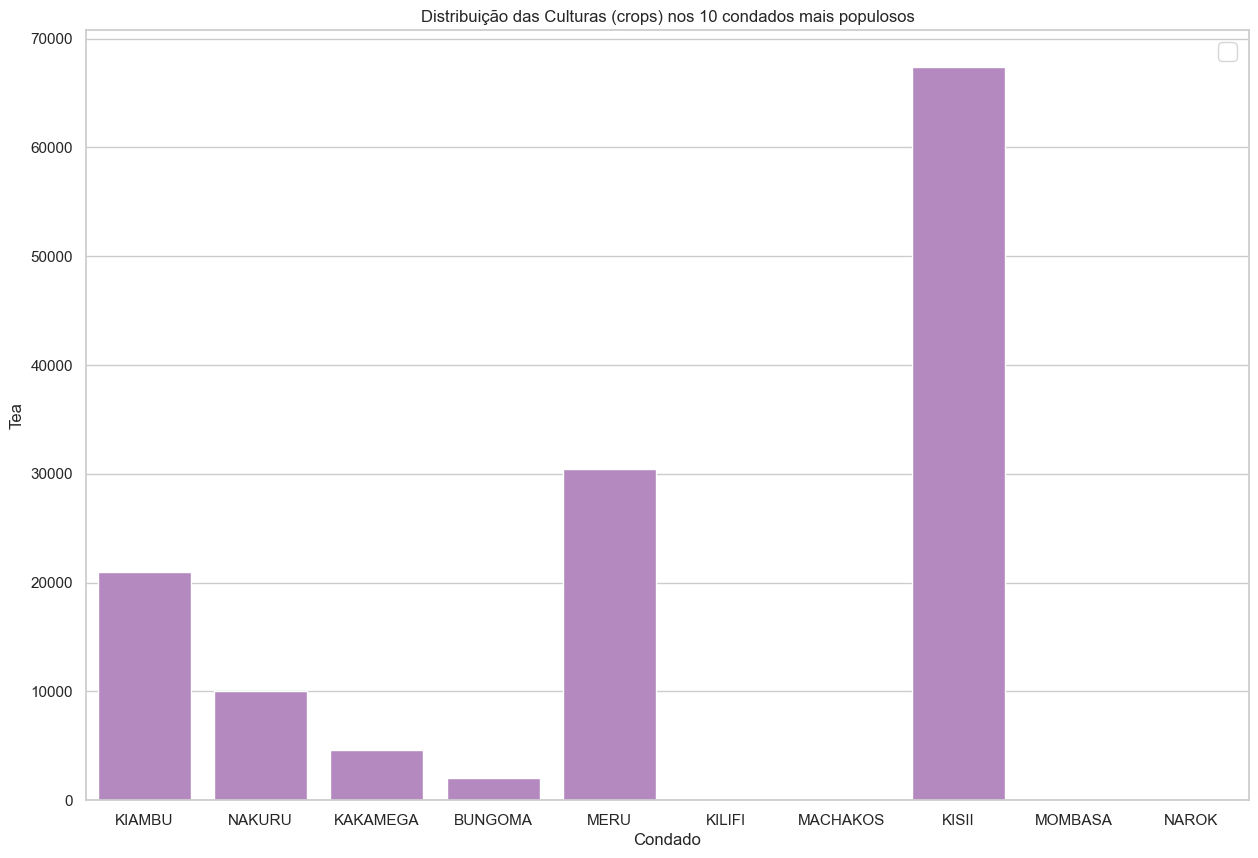

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


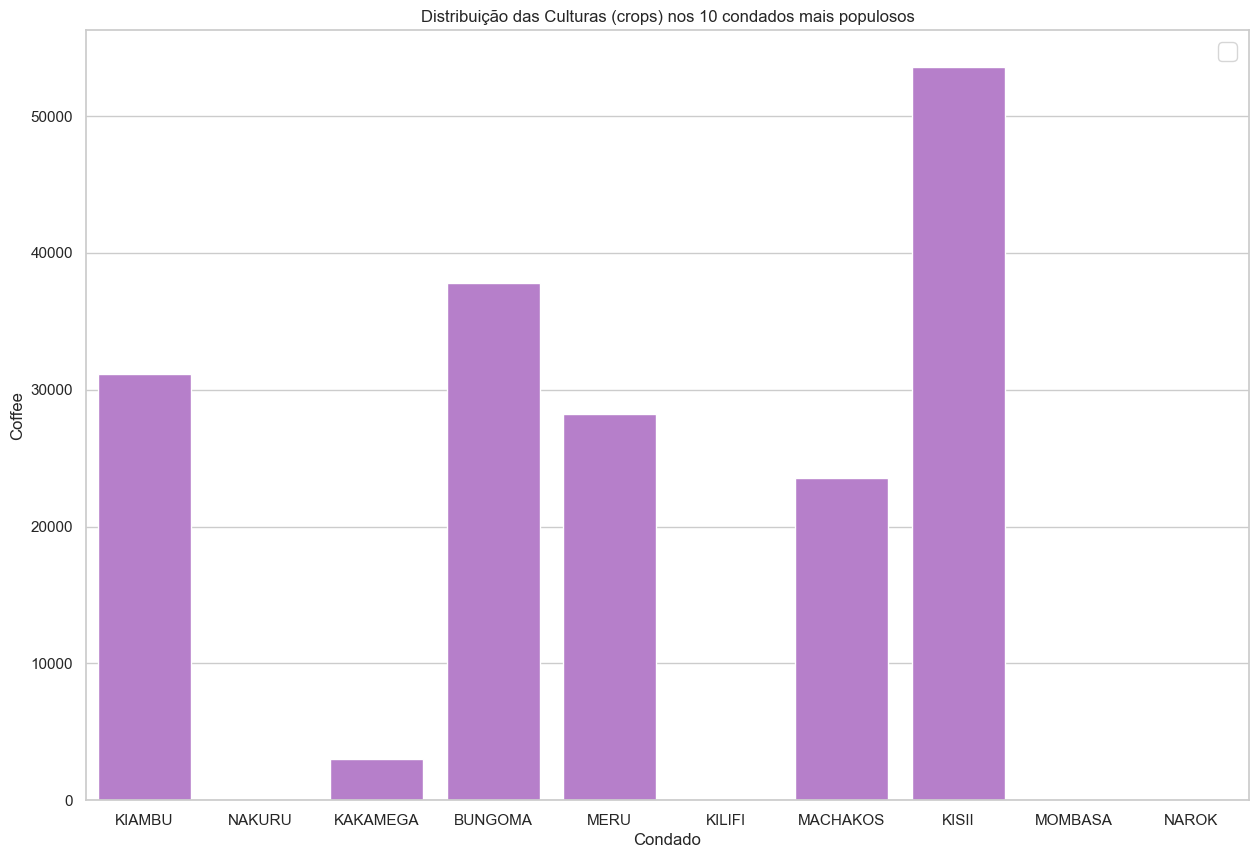

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


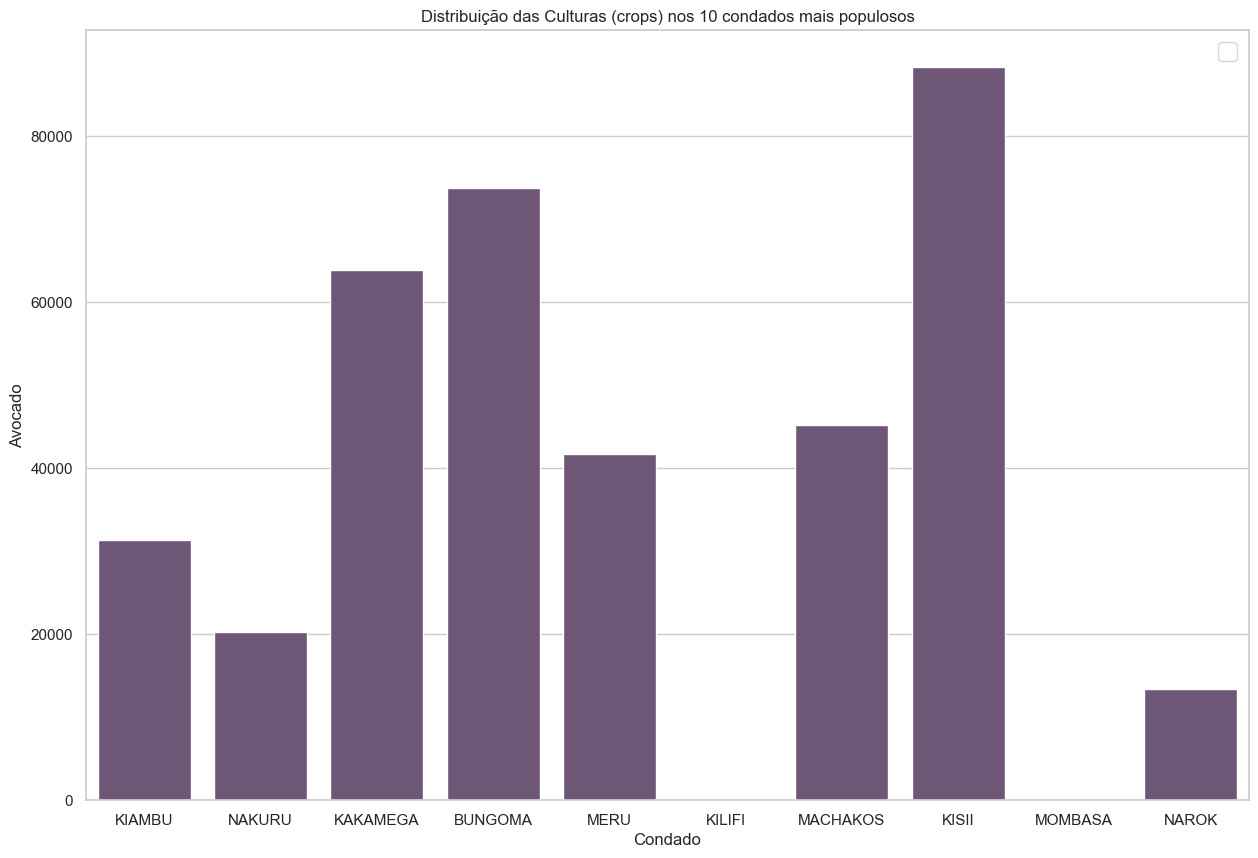

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


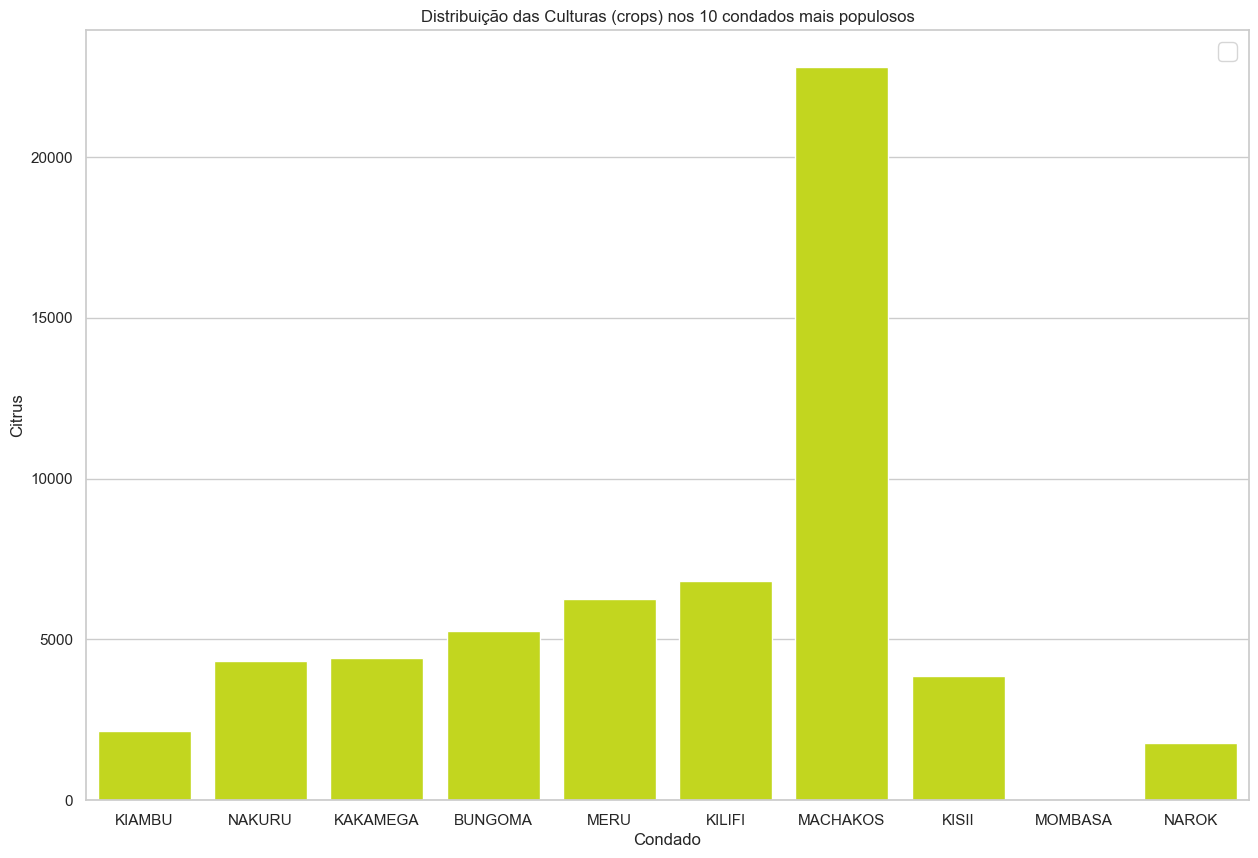

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


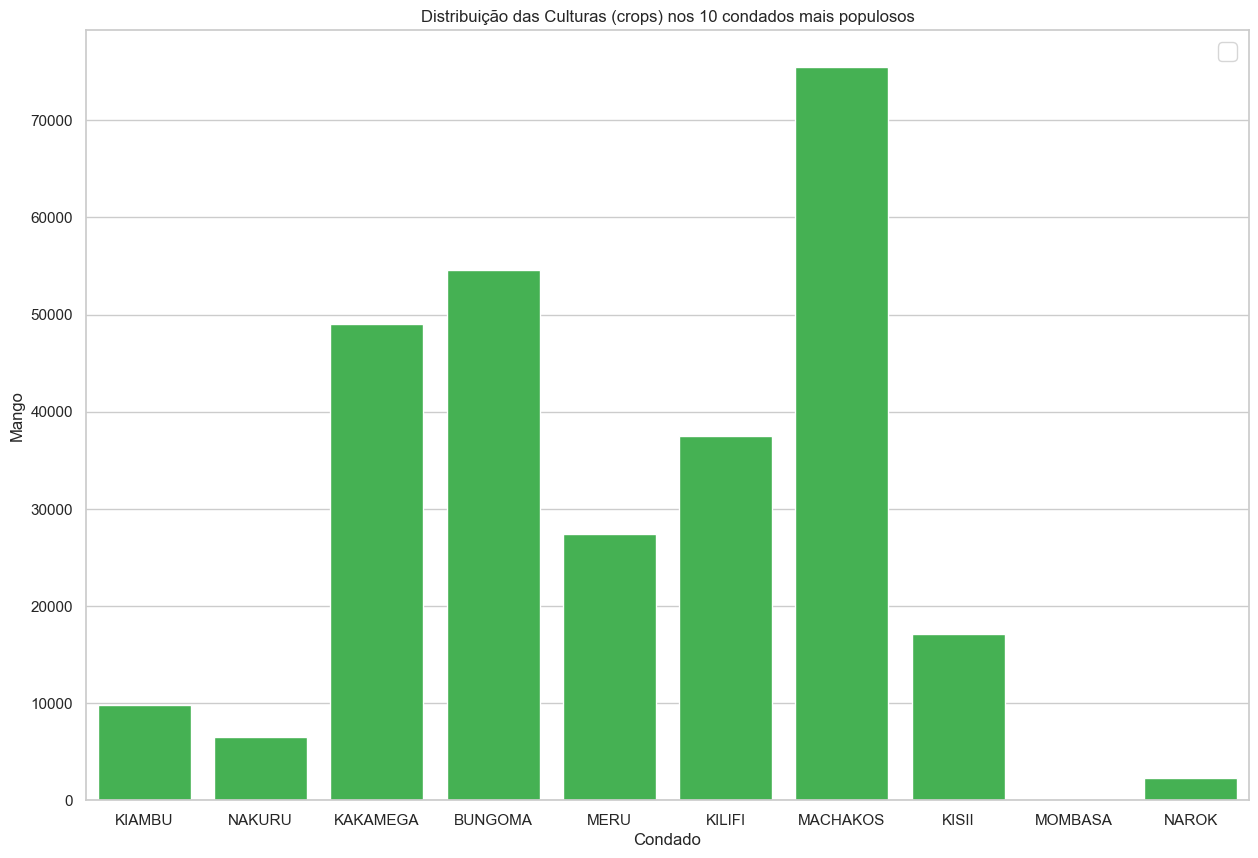

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


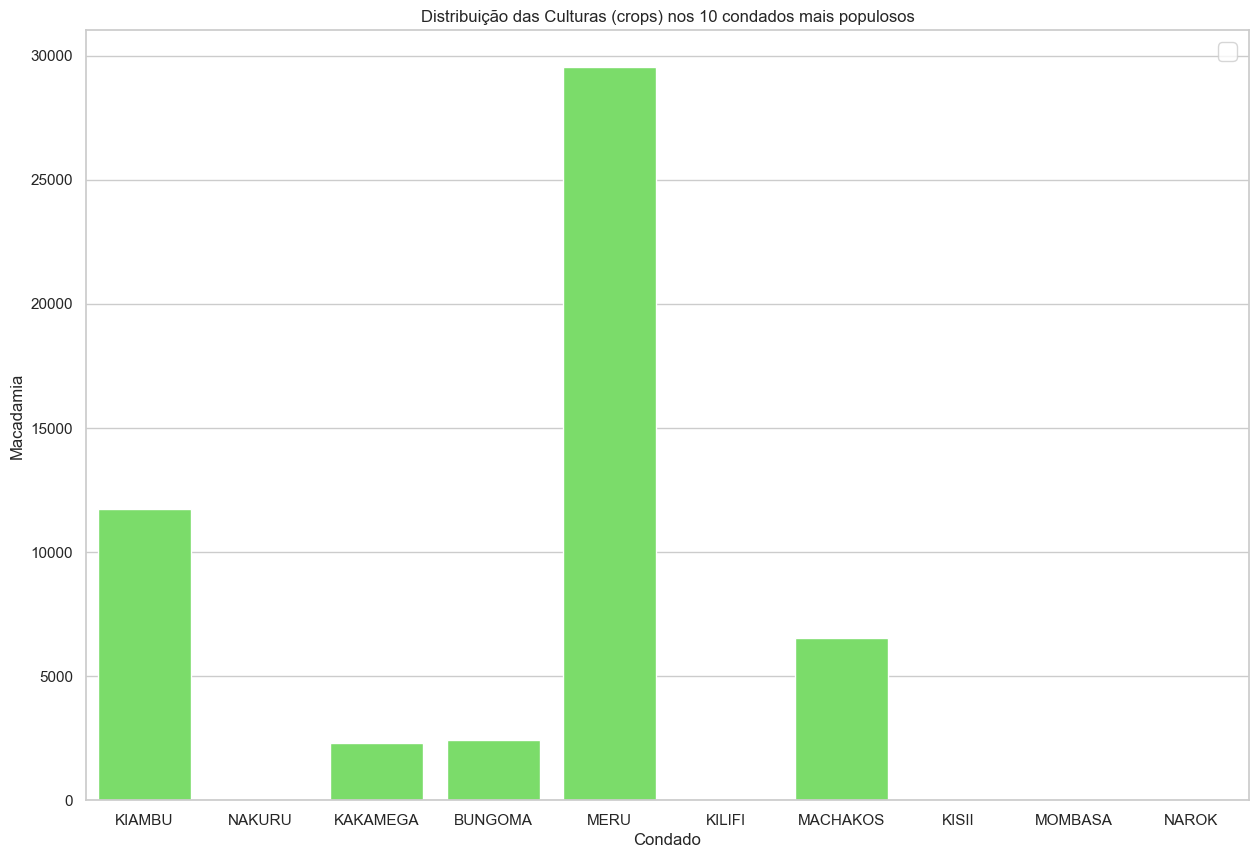

In [184]:

for column in ['Tea', 'Coffee', 'Avocado', 'Citrus', 'Mango', 'Macadamia']:
    plt.figure(figsize=(15,10))
    sns.barplot(top_10_pops_crops, x='County', y=column, color=random_color())
    plt.title('Distribuição das Culturas (crops) nos 10 condados mais populosos')
    plt.xlabel('Condado')
    plt.ylabel(column)
    plt.legend(fontsize="x-large")
    plt.show()


# Pergunta 4
Quais são os maiores plantadores de café, em número de pessoas trabalhando, dentre todos os condados?

## Resposta
O Quênia é um país famoso pelo seu café, logo vale a penas olhar mais de perto para essa cultura e ver onde ela emprega mais pessoas no país.

Aqui podemos perceber que Kisii de fato é um grande produtor, porém o maior produtor não está entre os 10 condados mais populosos: Murang'a.

Dos condados onde temos dados, temos 21 produtores de café, ou 51,22% do total. O que confirma a vocação cafeeira do Quênia.

In [192]:
coffee_producers = crops['County'].loc[crops['Coffee'] > 0].count()

In [195]:
print(f'São {coffee_producers} condados produtores de café, ou {(coffee_producers / crops.shape[0]) * 100:.2f}%')

São 21 condados produtores de café, ou 51.22%


<Axes: xlabel='County', ylabel='Coffee'>

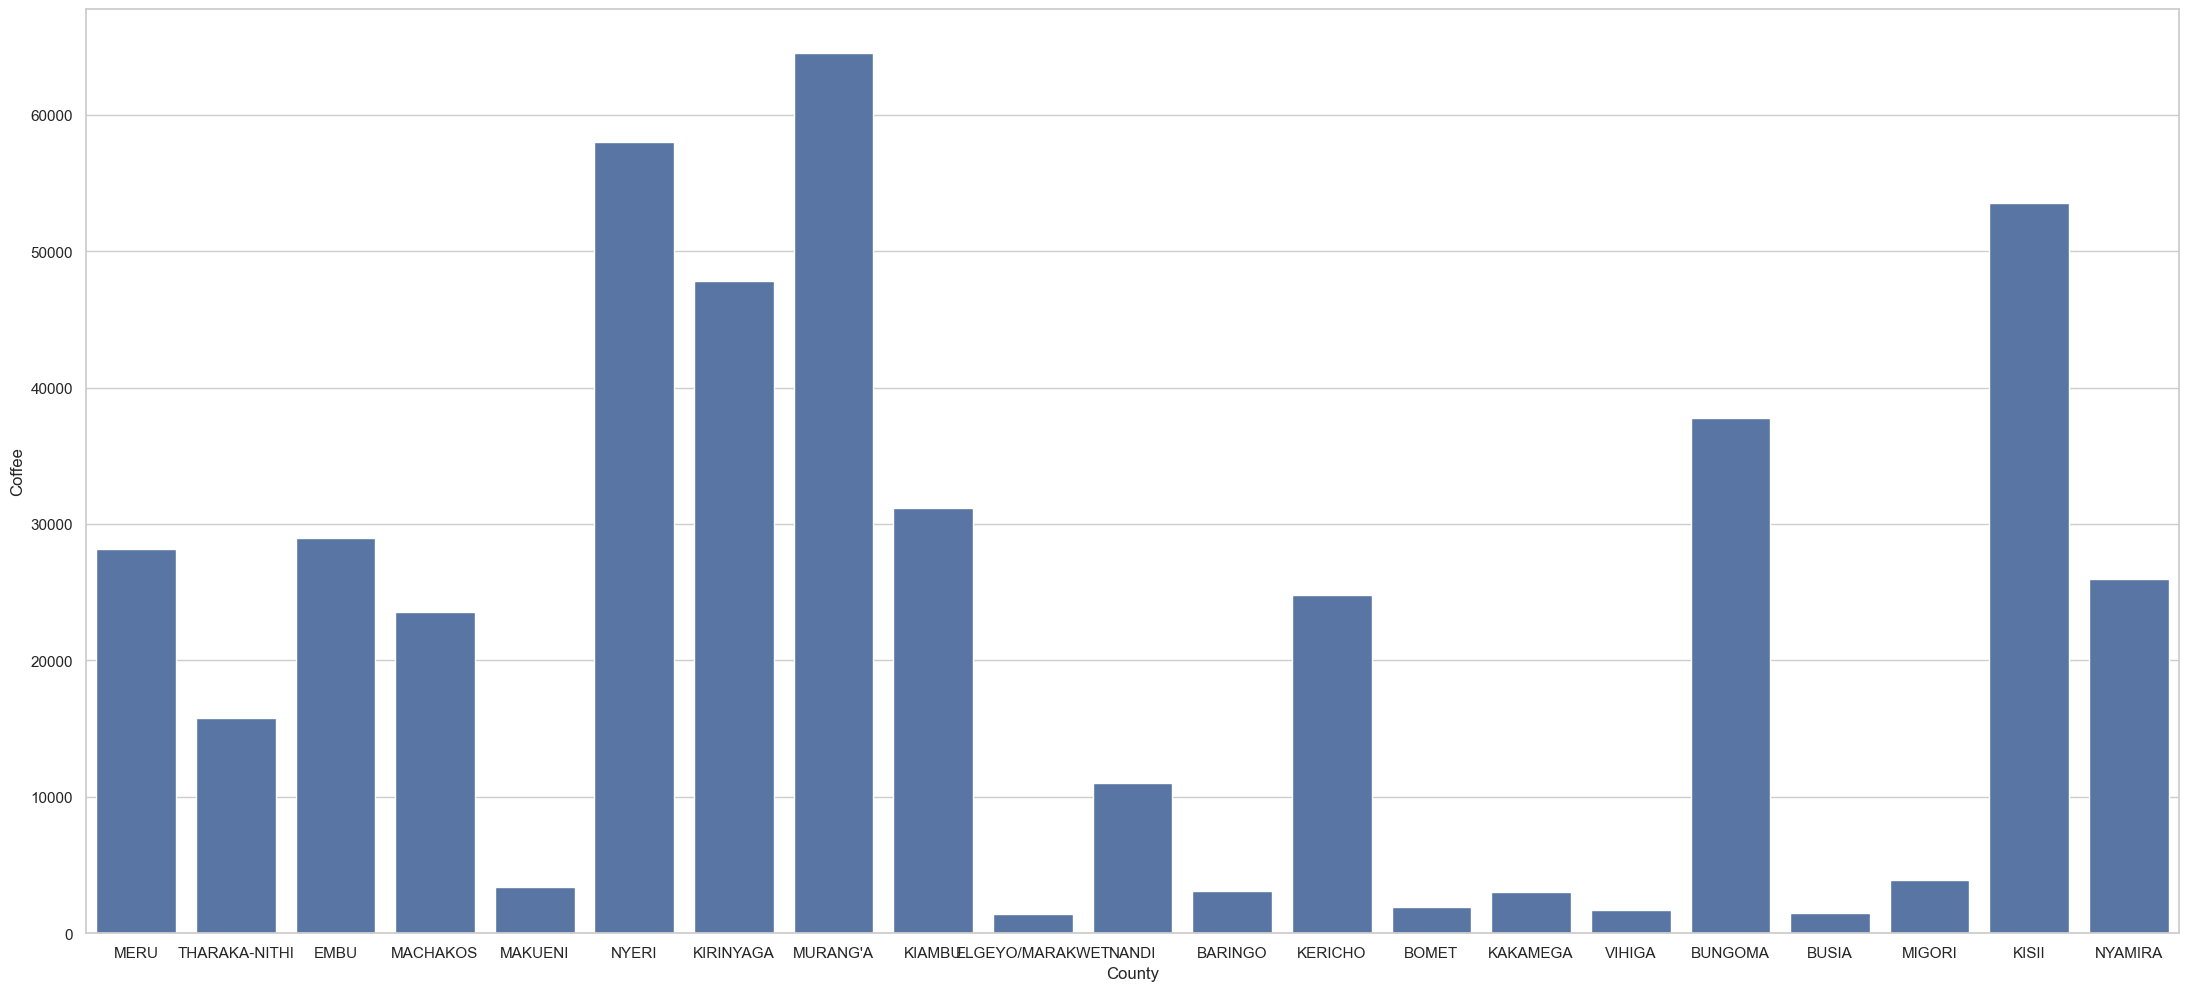

In [187]:
plt.figure(figsize=(27, 12))
sns.barplot(crops[crops['Coffee'] > 0], x='County', y='Coffee')

# Pergunta 5
Em quais condados as muheres estão presentes em número 5% maior que os homens ou mais?

Esses condados podem ter sofrido êxodo de homens no passado, conflitos armados ou mesmo ter alguma razão ecônomica para que mais mulheres que homens se estabeleçam por lá.  

## Resposta

Temos 11 condados com mais de 5% de mulheres a mais que homens (ou 26.83% do total):

- BUNGOMA
- BUSIA
- KAKAMEGA
- KILIFI
- KISII
- KISUMU
- KITUI
- MIGORI
- NYAMIRA
- SIAYA
- VIHIGA

## Analisando os dados

Vemos que a distribuição de homens e mulheres no Quênia é muito próxima, porém as mulheres levam uma leve vantagem em número. Isso pode se explicar por uma maior mortalidade dos homens causados por fatores como comportamento diferente entre os gêneros ou memso conflitos armados no passado.

In [211]:
gender_by_county = population_and_gender[['County', 'Male', 'Female']]

<Axes: >

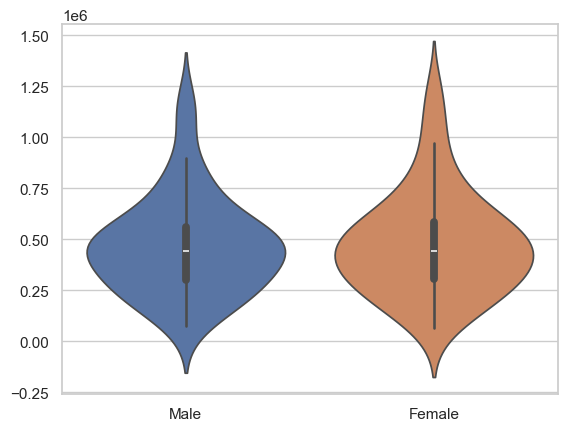

In [225]:
sns.violinplot(gender_by_county)

## Visualização dos dados

Abaixo vemos quais condados têm mais de 5% de mulheres a mais que homens.

In [239]:
counties_with_most_females = gender_by_county[gender_by_county['Female'] > gender_by_county['Male'] * 1.05]

In [238]:
counties_with_most_females['County'].sort_values()

34     BUNGOMA
35       BUSIA
32    KAKAMEGA
2       KILIFI
39       KISII
37      KISUMU
13       KITUI
38      MIGORI
40     NYAMIRA
36       SIAYA
33      VIHIGA
Name: County, dtype: object

In [232]:
number_of_counties_with_most_females = counties_with_most_females['County'].count()

print(f'Temos {number_of_counties_with_most_females} condados com mais de 5% de mulheres a mais que homens (ou {(number_of_counties_with_most_females / len(gender_by_county)) * 100:.2f}% do total)')

Temos 11 condados com mais de 5% de mulheres a mais que homens (ou 26.83% do total)


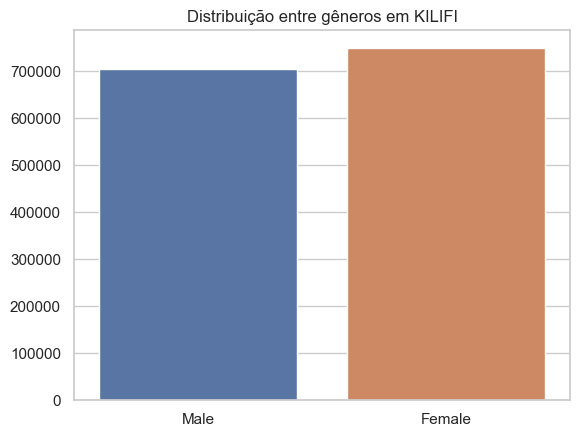

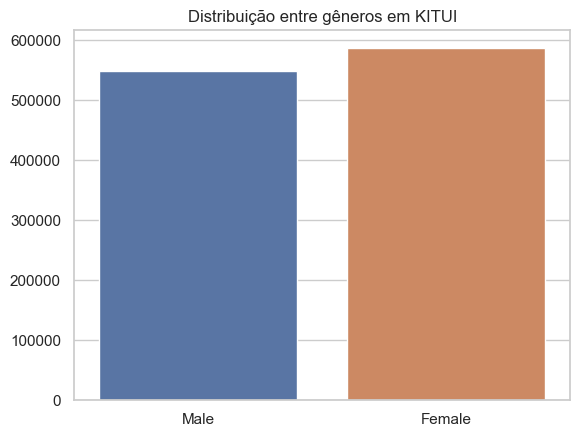

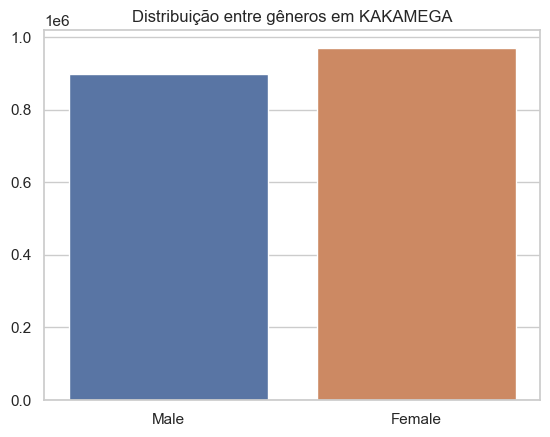

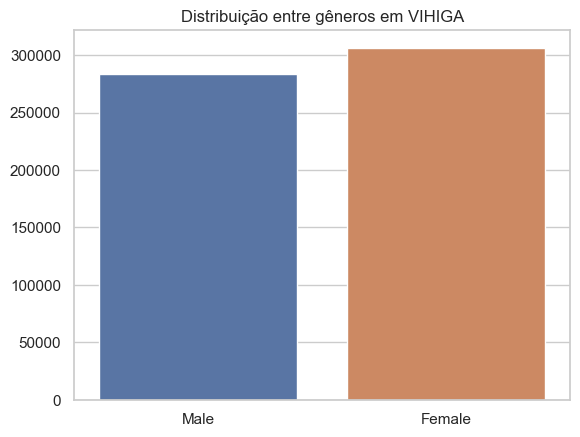

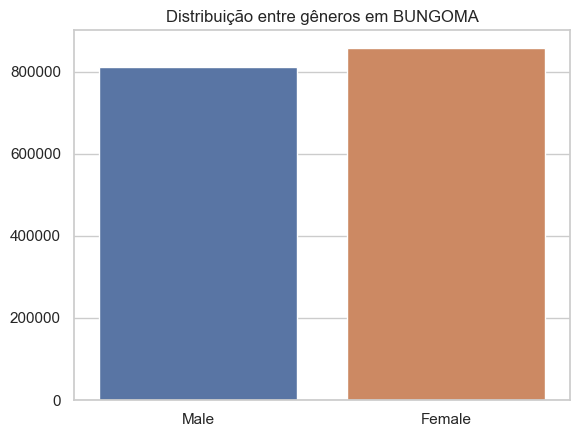

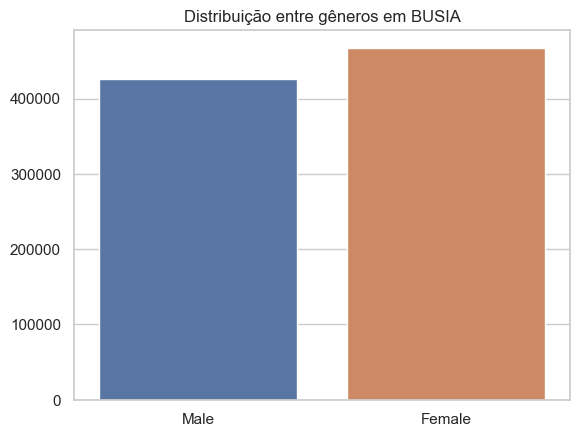

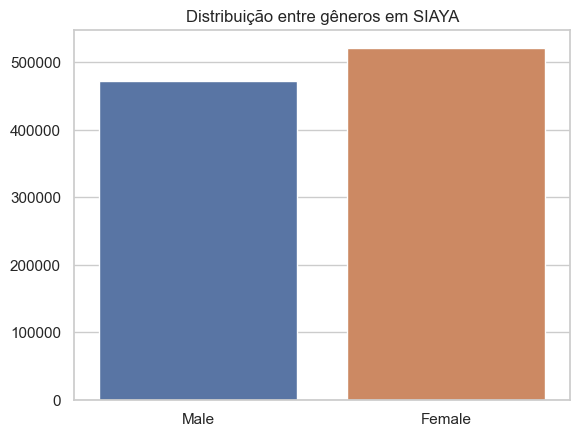

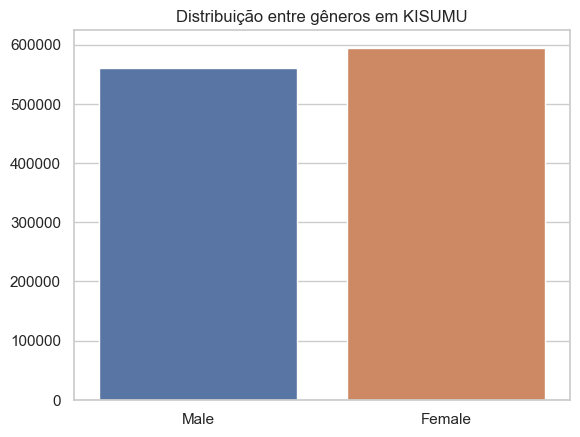

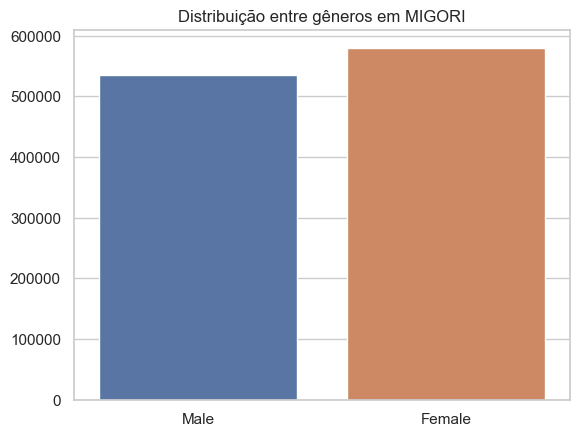

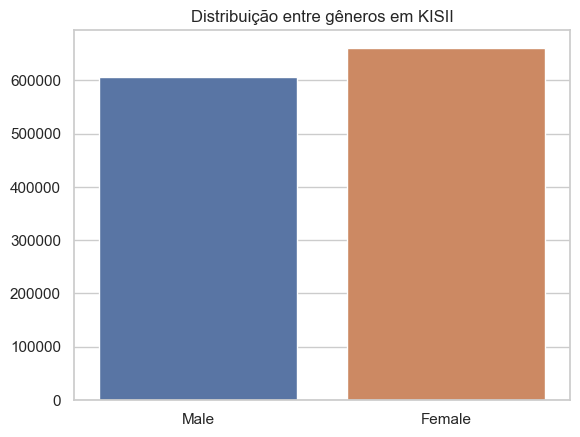

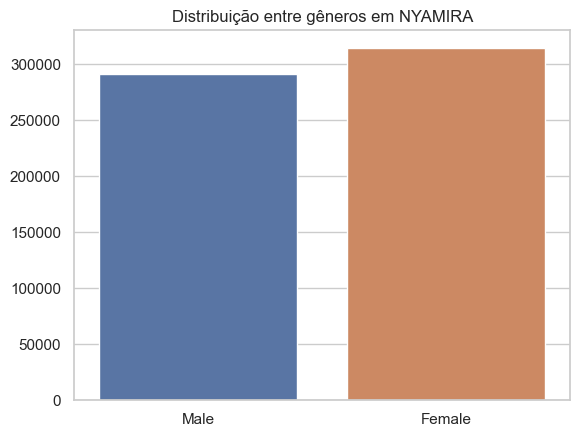

In [229]:
for county in counties_with_most_females['County']:
    plt.figure()
    sns.barplot(counties_with_most_females[counties_with_most_females['County'] == county])
    plt.title(f'Distribuição entre gêneros em {county}')
    plt.show()

# Pergunta 6

Quais os 10 condados com mais pessoas classificadas como `Intersex` como porcentagem da população? 

## Resposta

São eles:

| County    | Intersex Ratio |
| --------- | -------------- |
| WAJIR     | 0.000063       |
| KIAMBU    | 0.000056       |
| KIRINYAGA | 0.000051       |
| NAKURU    | 0.000044       |
| MANDERA   | 0.000043       |
| NYERI     | 0.000041       |
| GARISSA   | 0.000040       |
| EMBU      | 0.000039       |
| MARSABIT  | 0.000039       |
| LAIKIPIA  | 0.000035       | 

Percebemos que as taxas de pessoas declaradas como intersex são bem pequenas no Quênia. É difícil afirmar se isso deve a problemas nos dados, questões culturais que impedem as pessoas de se declararem como intersex ou mesmo que as taxas do Quênia são normais comparadas a de outros países já que estatísticas confiáveis sobre esse tema ainda são raras.

In [242]:
population_and_gender['Intersex Ratio'] = population_and_gender['Intersex'] / population_and_gender['Population']

counties_with_most_intersex = population_and_gender.sort_values(by='Intersex Ratio', ascending=False).head(10)

In [250]:
counties_with_most_intersex[['County', 'Intersex Ratio']]

,County,Intersex Ratio
6,WAJIR,0.000063
20,KIAMBU,0.000056
18,KIRINYAGA,0.000051
27,NAKURU,0.000044
7,MANDERA,0.000043
17,NYERI,0.000041
5,GARISSA,0.000040
12,EMBU,0.000039
8,MARSABIT,0.000039
26,LAIKIPIA,0.000035


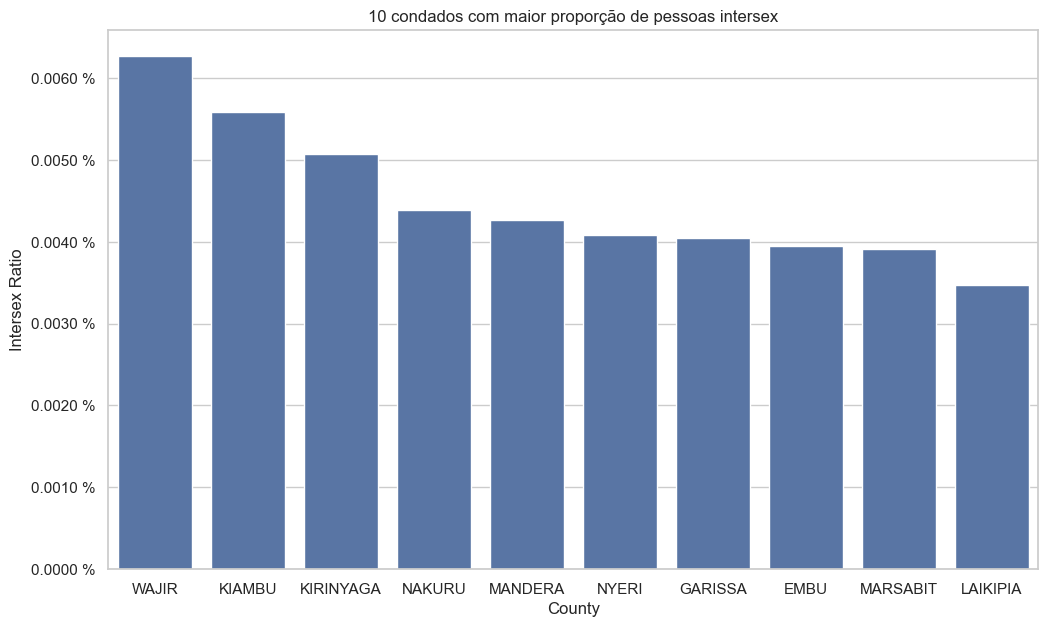

In [246]:
plt.figure(figsize=(12, 7))

sns.barplot(counties_with_most_intersex, x='County', y='Intersex Ratio')

plt.title('10 condados com maior proporção de pessoas intersex')

def format_ticks(value, _):
    return f'{value * 100:.4f} %'

plt.gca().yaxis.set_major_formatter(FuncFormatter(format_ticks))
plt.show()

# Conclusão

O Quênia apresenta indícios de ser uma sociedade [conservadora do ponto de vista dos costumes](https://en.wikipedia.org/wiki/LGBT_rights_in_Kenya) e [assolada por conflitos](https://www.bbc.com/news/uk-12997138), nossos dados parecem nos apontar nessa direção também.

Além disso o Quênia tem uma [tradição cafeeira](https://en.wikipedia.org/wiki/Coffee_production_in_Kenya), devido a sua proximidade com a Etiópia (origem provável da planta do café). Isso ficou evidente nos nossos dados devido à proporção de condados que cultivam café. 

Por outro lado vimos também que alguns poucos condados concentram a maior parte da produção, indicando que a agricultura do Quênia é bastante concentrada. Gostaríamos de ter obtido mais dados sobre a geografia do país para entender se isso se deve a causas naturias ou não.

Como recomandação, é importante reforçar a educação e reforço sobre a importância dos direitos LGTQIA+ e a estabilidade social para que a distribuição de gêneros no Quênia possa ser mais equânime.

---

# Apêndice A - Avaliação

In [ ]:
#@markdown ---
#@title Notas
Completo = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown São apresentadas todas as 6 perguntas e empregadas estatísticas descritivas, seleções simples e múltiplas, agrupamentos e transformações dos dados.
Relevancia = 9 #@param {type:"slider", min:0, max:10, step:1}
#@markdown O tema é abordado corretamente e as perguntas e análises pertinentes ao problema.
Tecnicas = 10 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As técnicas de gadas estatíticas dos dados, seleções, agrupamentos e transformações são corretamente aplicadas
Apresentacao = 5 #@param {type:"slider", min:0, max:10, step:1}
#@markdown A apresentação dos resultados é clara e objetiva
Conclusao = 3 #@param {type:"slider", min:0, max:10, step:1}
#@markdown As conclusões são justificadas e relevantes
Bonus = 0.5 #@param {type:"slider", min:0, max:1, step:0.5}
#@markdown A critério do professor por inovações na abordagem e no uso de técnicas de Análise de Dados

#@markdown ---
#@markdown ### Apresentação
Datafolio = 0 #@param {type:"slider", min:0, max:10, step:1}
Video = 0 #@param {type:"slider", min:0, max:10, step:1}

#@markdown ### Sumário
#@markdown ---

resumo = {}
for q in range(1,7):
  resumo[q] = []
  for t in ['a','b','c','d','e','f']:
    exec( 'resumo[q].append(Q' + str(q) + t + ')')

for q, recurso in resumo.items():
  for i in range(len(recurso)):
    if recurso[i][0:5] == 'Entre':
      recurso[i] = 'None'

print('Resumo')
print(60*'-')
for q in resumo:
  print('*** Questão: ', q)
  for r in resumo[q]:
    print(r)



Resumo
------------------------------------------------------------
*** Questão:  1
None
None
None
None
None

*** Questão:  2
None
None
None
None
None

*** Questão:  3
None
None
None
None
None

*** Questão:  4
None
None
None
None
None

*** Questão:  5
None
None
None
None
None

*** Questão:  6
None
None
None
None
None



In [ ]:
#@markdown ### Nota Final
Nota1 = Completo + Relevancia + Tecnicas + Apresentacao + Conclusao
Nota2 = Datafolio + Apresentacao

nota = (Nota1 + Nota2) / 7 + Bonus

nota = Nota1 / 5 + Bonus

print(f'Nota final do trabalho {nota :.2f}')



Nota final do trabalho 7.90
